<font size="6">題目</font><br>
<font size="4">The goal of this exercise is to Implement a SGDRegressor with the following parameters:</font><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   SGDRegressor(loss='squared_loss’, penalty='l2’, alpha=0.0001)<br>

The data to be imported is based on a project provided by Kaggle includes 13 features.Some features may have missing values. To prevent the hurt of the accuracy of the model, missing values should be imputed before the SGDRegressor is in progress. Output the R-square value. 

data: https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees

<font size="4" color="red">請在選擇相關係數表中選擇與actual_productivity最大正相關與最大負相關的兩個值來做SGDRegressor<br>
Please choose the maxmum and minmum correlation coefficient to predict actual_productivity
</font><br>


<font size="4">檢查要點：</font>


1.   是否執行缺失值處理
2.   是否正確的照題目使用SGDRegressor
3.   R2準確度是否有做出來（值不會跟參考答案完全一樣）




In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

#查看pandas表格資料的方法
這裡的data必須為pandas的dataframe格式。<br>
print(data) #使用pandas印出資料，在ipython中可以只用data就好<br>
print(data.head()) #印出前五筆資料<br>
data.tail() #印出後五筆資料<br>
data.info() #資料欄位的型態<br>
data.shape #資料長寬的大小<br>


In [42]:
#使用pd.read_csv讀入data
data = pd.read_csv("garments_worker_productivity.csv")
data
data.shape


(1197, 15)

#檢查缺失值及處理
data.isnull #檢查資料的是否缺失也可以使用data.isna。<br>

<font size="4">直接刪除該行：</font><br>
data = data.drop(labels='該行的key', axis=1) #移除某一行的資料<br>
也可以使用以下方法來刪除：<br>
del data['key']

<br><font size="4">新增該行的資料並補上：</font><br>
XXX = pd.Series([1, 1, 1, 1, 0, 1], index = [1, 2, 3, 4, 5, 6])<br>
df['key'] = XXX

也可以使用loc 和 iloc等方法來補上
<br>
<br>
官方文件：
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html</a><br>

In [43]:
#檢查缺失值，若缺失資料超過百分之20則去除，反之則補上數值
#tips 可以使用.sum()查看該欄缺失值的統計 

"""
write your code here
"""
data.isnull().sum()
null_num = 506/1197
if null_num > 20/100:
  data = data.drop(labels='wip',axis=1)
else:
  info = pd.Series([1,1,1,1,0,1],index = [1,2,3,4,5,6])
  data['wip'] = info
data

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


#得到相關係數表
在相關係數中若兩兩距離0的數值差異越大則代表該數值的影響力越大
另外如果是正值的話代表兩者為正相關，反之則為負相關<br>
這裡是直接使用pandas的方法來得到最大和最小相關係數<br>
這裡要找與actual_productivity最大正相關與最大負相關的係數來做

In [44]:
#查看每個變數之間的相關係數 並顯示至小數點第二位
correlation_matrix = data.corr().round(2) 
correlation_matrix.style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030000,-0.110000,-0.100000,-0.010000,0.000000,0.030000,-0.010000,-0.080000,-0.150000
targeted_productivity,0.030000,1.000000,-0.070000,-0.090000,0.030000,-0.060000,-0.050000,-0.210000,-0.080000,0.420000
smv,-0.110000,-0.070000,1.000000,0.670000,0.030000,0.060000,0.110000,0.320000,0.910000,-0.120000
over_time,-0.100000,-0.090000,0.670000,1.000000,-0.000000,0.030000,-0.020000,0.060000,0.730000,-0.050000
incentive,-0.010000,0.030000,0.030000,-0.000000,1.000000,-0.010000,-0.020000,-0.030000,0.050000,0.080000
idle_time,0.000000,-0.060000,0.060000,0.030000,-0.010000,1.000000,0.560000,-0.010000,0.060000,-0.080000
idle_men,0.030000,-0.050000,0.110000,-0.020000,-0.020000,0.560000,1.000000,0.130000,0.110000,-0.180000
no_of_style_change,-0.010000,-0.210000,0.320000,0.060000,-0.030000,-0.010000,0.130000,1.000000,0.330000,-0.210000
no_of_workers,-0.080000,-0.080000,0.910000,0.730000,0.050000,0.060000,0.110000,0.330000,1.000000,-0.060000
actual_productivity,-0.150000,0.420000,-0.120000,-0.050000,0.080000,-0.080000,-0.180000,-0.210000,-0.060000,1.000000


#使用sklearn learn 做 SGDRegressor

最大正相關:<font color="orange"> targeted_productivity </font><br>
最大負相關:<font color="blue"> actual_productivity</font><br>

相關文件:<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn 資料分割 官方文件</a>

<a href="https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor">sklearn SGDRegressor 文件</a>


In [45]:
#numpy.c_將兩個陣列組成一個輸入
X = pd.DataFrame(np.c_[data['targeted_productivity'], data['no_of_style_change']])
Y = data['actual_productivity']

#資料分割 請分成train和test 8比2 8:2 並使用ramdom 3
"""
write your code here
"""
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3 )
# 初始化SGDRegressor隨機梯度回歸模型
"""
write your code here
"""
sgdr= SGDRegressor(loss='squared_loss',penalty='l2', alpha=0.0001)
# 訓練
"""

write your code here
"""
sgdr.fit(X_train, Y_train)
# 預測 保存預測結果
"""
write your code here
"""
sgdr_y_predict = sgdr.predict(X_test)

#使用Ｒ2瞭解準確度
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score


In [46]:
# 使用R2印出準確度
"""
write your code here
"""
sgdr_R_squared = r2_score(Y_test, sgdr_y_predict)
print("SGD的R_squared值為：", sgdr_R_squared)

SGD的R_squared值為： 0.18048128446237088


參考結果：

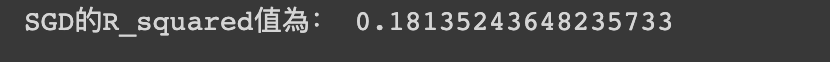